<a href="https://colab.research.google.com/github/cshah13/workforce-opportunities-baltimore-denver/blob/main/Shah_Baltimore_Denver_Job_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries


In [2]:
# import libraries

# data analysis
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import plotly.express as px

# download files to our computer
from google.colab import files 

# Import Data for Baltimore Job Availability


Imported data from [this github here](https://github.com/cshah13/workforce-opportunities-baltimore-denver)

In [3]:
# import csv of baltimore city job availability data

# save github csv link
job_data = "https://raw.githubusercontent.com/cshah13/workforce-opportunities-baltimore-denver/main/Original%20Baltimore%20Job%20Data%20CSV.csv"

#define our initial dataframe
df_job = pd.read_csv(job_data)

# Look at Our Data


In [4]:
# preview the first five rows
df_job.head()

,tract,location,availability_of_jobs_in_2013
0,24510040100,"Downtown, Baltimore, MD",122894.0
1,24510040200,"Downtown, Baltimore, MD",109592.0
2,24510060400,"Baltimore, MD",80681.0
3,24510070400,"Gay Street, Baltimore, MD",75325.0
4,24510100300,"Penn - Fallsway, Baltimore, MD",43650.0


In [5]:
# preview last five rows of the data
df_job.tail()

,tract,location,availability_of_jobs_in_2013
409,24005451801,"Middle River, MD",44.050
410,24005400500,"Catonsville, MD",34.410
411,24005451000,"Essex, MD",34.000
412,24510280302,"West Forest Park, Baltimore, MD",18.970
413,24005402202,"Baltimore County, MD",8.908


In [6]:
# general stats to help us understand the data
df_job.describe()

,tract,availability_of_jobs_in_2013
count,4.140000e+02,414.00000
mean,2.425039e+10,3304.56572
std,2.515037e+08,10483.04627
min,2.400373e+10,8.90800
25%,2.400542e+10,509.12500
50%,2.402760e+10,1084.00000
75%,2.451019e+10,2423.75000
max,2.451028e+10,122894.00000


In [7]:
# delete the tract column

del df_job["tract"]

In [8]:
df_job.head()

,location,availability_of_jobs_in_2013
0,"Downtown, Baltimore, MD",122894.0
1,"Downtown, Baltimore, MD",109592.0
2,"Baltimore, MD",80681.0
3,"Gay Street, Baltimore, MD",75325.0
4,"Penn - Fallsway, Baltimore, MD",43650.0


Remove Non-Baltimore Data

In [9]:
df_job['location'].str.contains("baltimore")

0      False
1      False
2      False
3      False
4      False
       ...  
409    False
410    False
411    False
412    False
413    False
Name: location, Length: 414, dtype: bool

In [10]:
df_baltimore = df_job[df_job['location'].str.contains("Baltimore")]


In [11]:
df_baltimore.head()

,location,availability_of_jobs_in_2013
0,"Downtown, Baltimore, MD",122894.0
1,"Downtown, Baltimore, MD",109592.0
2,"Baltimore, MD",80681.0
3,"Gay Street, Baltimore, MD",75325.0
4,"Penn - Fallsway, Baltimore, MD",43650.0


In [12]:
df_baltimore = df_baltimore.rename(columns = {"location" : "location", "availability_of_jobs_in_2013" : "jobs_per_sq_mile"})

In [13]:
df_baltimore.head()

,location,jobs_per_sq_mile
0,"Downtown, Baltimore, MD",122894.0
1,"Downtown, Baltimore, MD",109592.0
2,"Baltimore, MD",80681.0
3,"Gay Street, Baltimore, MD",75325.0
4,"Penn - Fallsway, Baltimore, MD",43650.0


In [14]:
# general stats to help us understand the data
df_baltimore.describe()

,jobs_per_sq_mile
count,236.000000
mean,4595.614949
std,13565.769201
min,8.908000
25%,605.650000
50%,1233.000000
75%,3112.000000
max,122894.000000


# Create a Bar Graph for Baltimore Job Availability

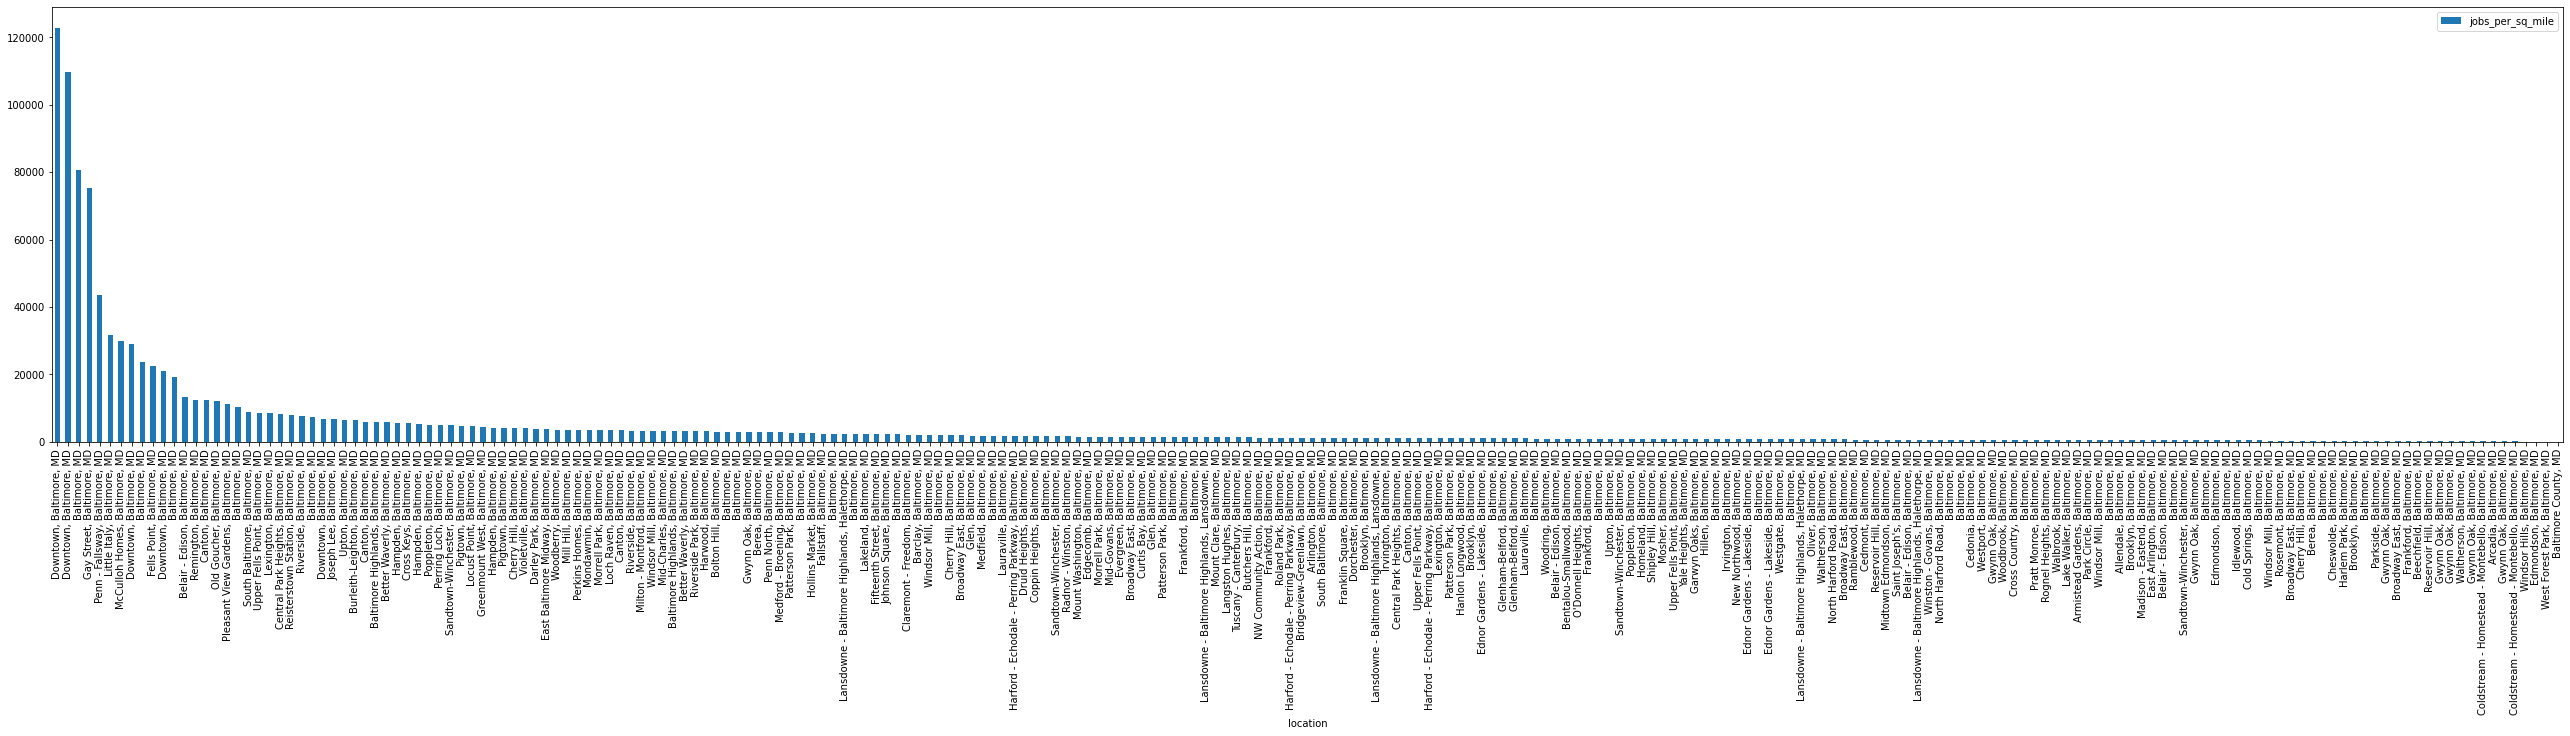

In [15]:
# plot average number of jobs available per square mile in a bar graph
df_baltimore.plot(x = "location", y = "jobs_per_sq_mile", kind = "bar", figsize = (45,8))

Text(0, 0.5, 'Average Number of Jobs Available Per Square Mile')

<Figure size 432x288 with 0 Axes>

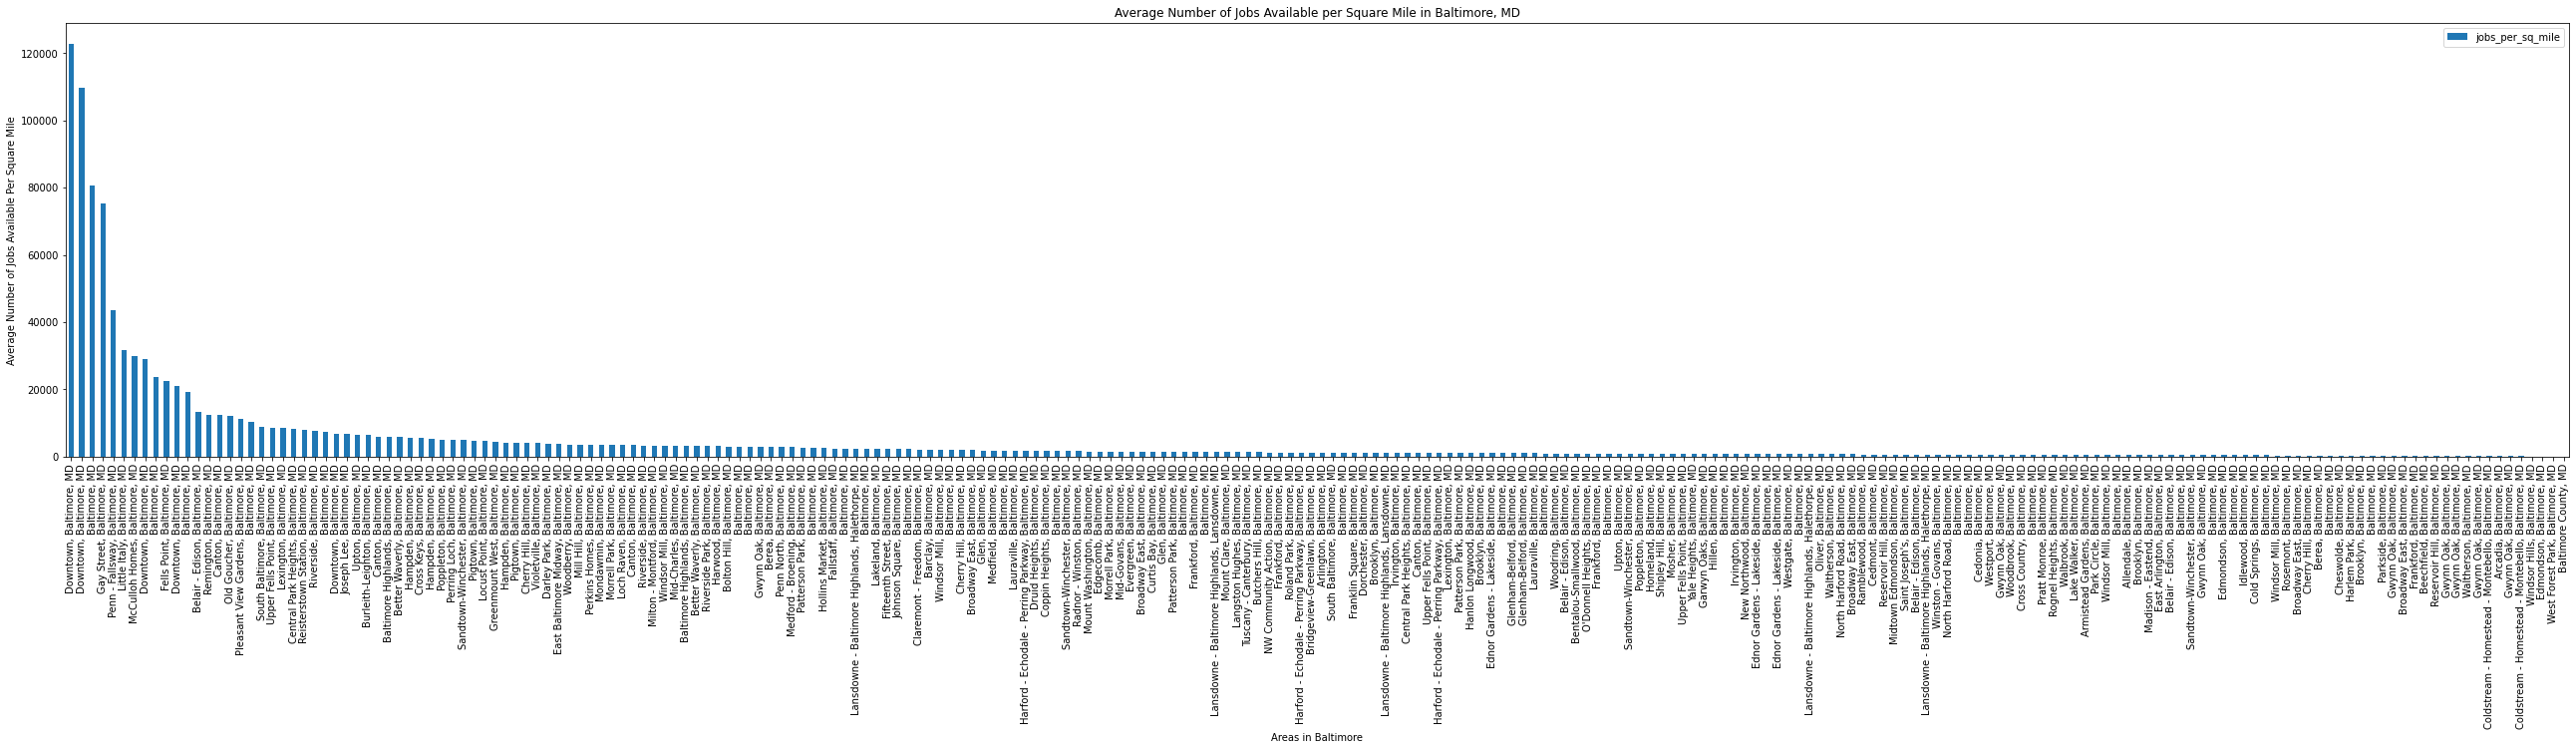

In [16]:
# add graph labels
bmore_jobs_fig = plt.figure()

df_baltimore.plot(x = "location", y = "jobs_per_sq_mile", kind = "bar", figsize = (45,8), title = "Average Number of Jobs Available per Square Mile in Baltimore, MD")
plt.xlabel("Areas in Baltimore")
plt.ylabel("Average Number of Jobs Available Per Square Mile")

In [17]:
# save our graph
bmore_jobs_fig.savefig("jobs_bmore.png")

In [18]:
#downloading the files from google colab
files.download("jobs_bmore.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
# melt dataframe to work easier with plotly express
df_agg_melt = pd.melt(df_baltimore, id_vars = ["location"])

In [20]:
df_agg_melt.head()

,location,variable,value
0,"Downtown, Baltimore, MD",jobs_per_sq_mile,122894.0
1,"Downtown, Baltimore, MD",jobs_per_sq_mile,109592.0
2,"Baltimore, MD",jobs_per_sq_mile,80681.0
3,"Gay Street, Baltimore, MD",jobs_per_sq_mile,75325.0
4,"Penn - Fallsway, Baltimore, MD",jobs_per_sq_mile,43650.0


In [21]:
# make bar graph in plotly express
bmore_job_fig = px.bar(df_baltimore, x = 'location', y = 'jobs_per_sq_mile', title="Average Number of Jobs Available per Square Mile in Baltimore, MD", labels = {"location": "Areas in Baltimore", "jobs_per_sq_mile": "Average Number of Jobs Available Per Square Mile"}, width=1200, height=1000)
bmore_job_fig.show()



In [22]:
# save an html file 
bmore_job_fig.write_html("plotly_bar_bmorejobs.html")

In [23]:
#download from google
files.download("plotly_bar_bmorejobs.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
#remove repeat locations
df_avgbmorejob = df_baltimore.groupby("location")["jobs_per_sq_mile"].agg(["mean"]).reset_index()

In [40]:
df_avgbmorejob.head()

,location,mean
0,"Allendale, Baltimore, MD",501.100
1,"Arcadia, Baltimore, MD",97.830
2,"Arlington, Baltimore, MD",1228.000
3,"Armistead Gardens, Baltimore, MD",516.400
4,"Baltimore County, MD",8.908


In [63]:
#recreate graph
bmorejob__fig = px.bar(df_avgbmorejob, x = 'location', y = 'mean', title="Average Number of Jobs Available per Square Mile in Baltimore, MD", labels = {"location": "Areas in Baltimore", "mean": "Average Number of Jobs Available Per Square Mile"}, width=1200, height=1000,)
bmorejob__fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
bmorejob__fig.show()

Import Data for Denver Job Availability

Imported data from [this github here](https://github.com/cshah13/workforce-opportunities-baltimore-denver)

In [24]:
# import csv of denver job availability data

# save github csv link
denverjob_data = "https://raw.githubusercontent.com/cshah13/workforce-opportunities-baltimore-denver/main/Original%20Denver%20Job%20Data%20CSV.csv"

#define our initial dataframe
df_denverjob = pd.read_csv(denverjob_data)

In [25]:
# preview the first five rows
df_denverjob.head()

,tract,location,availability_of_jobs_in_2013
0,8031001702,"Central, Denver, CO",148450.0
1,8031002601,"Central, Denver, CO",85383.0
2,8031002702,"Central, Denver, CO",61087.0
3,8031001701,"Ballpark, Denver, CO",55027.0
4,8031002701,"Capitol Hill, Denver, CO",36077.0


In [26]:
# preview last five rows of the data
df_denverjob.tail()

,tract,location,availability_of_jobs_in_2013
459,8005083000,"The Conservatory at the Plains, Aurora, CO",13.890
460,8005007105,"Aurora, CO",6.761
461,8005007106,"Aurora, CO",5.774
462,8005007103,"Bennett, CO",5.106
463,8001008401,"Bennett, CO",3.687


In [27]:
# delete the tract column

del df_denverjob["tract"]

In [28]:
df_denverjob.head()

,location,availability_of_jobs_in_2013
0,"Central, Denver, CO",148450.0
1,"Central, Denver, CO",85383.0
2,"Central, Denver, CO",61087.0
3,"Ballpark, Denver, CO",55027.0
4,"Capitol Hill, Denver, CO",36077.0


In [29]:
# general stats to help us understand the data
df_denverjob.describe()

,availability_of_jobs_in_2013
count,464.000000
mean,2801.515233
std,9339.650719
min,3.687000
25%,346.150000
50%,945.250000
75%,2180.250000
max,148450.000000


Remove Non-Denver Data

In [30]:
df_denver = df_denverjob[df_denverjob['location'].str.contains("Denver")]

In [31]:
df_denverjob.head()

,location,availability_of_jobs_in_2013
0,"Central, Denver, CO",148450.0
1,"Central, Denver, CO",85383.0
2,"Central, Denver, CO",61087.0
3,"Ballpark, Denver, CO",55027.0
4,"Capitol Hill, Denver, CO",36077.0


In [32]:
# general stats to help us understand the data
df_denver.describe()

,availability_of_jobs_in_2013
count,168.000000
mean,5137.737202
std,14935.647544
min,22.730000
25%,627.200000
50%,1658.000000
75%,3462.500000
max,148450.000000


# Create a Bar Graph with Denver Job Availability Data

In [33]:
# melt dataframe to work easier with plotly express
df_agg_meltt = pd.melt(df_denver, id_vars = ["location"])

In [34]:
df_agg_meltt.head()

,location,variable,value
0,"Central, Denver, CO",availability_of_jobs_in_2013,148450.0
1,"Central, Denver, CO",availability_of_jobs_in_2013,85383.0
2,"Central, Denver, CO",availability_of_jobs_in_2013,61087.0
3,"Ballpark, Denver, CO",availability_of_jobs_in_2013,55027.0
4,"Capitol Hill, Denver, CO",availability_of_jobs_in_2013,36077.0


In [35]:
# make bar graph in plotly express
den_job_fig = px.bar(df_denver, x = 'location', y = 'availability_of_jobs_in_2013', title="Average Number of Jobs Available per Square Mile in Denver, CO", labels = {"location": "Areas in Denver", "availability_of_jobs_in_2013": "Average Number of Jobs Available Per Square Mile"}, width=1200, height=1200)
den_job_fig.show()

In [36]:
# save an html file 
den_job_fig.write_html("plotly_bar_denjobs.html")

In [37]:
#download from google
files.download("plotly_bar_denjobs.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
#remove repeat locations
df_avgdenverjob = df_denver.groupby("location")["availability_of_jobs_in_2013"].agg(["mean"]).reset_index()

In [43]:
df_avgdenverjob.head()

,location,mean
0,"Alamo Placita, Denver, CO",3784.0
1,"Ballpark, Denver, CO",55027.0
2,"Barnum West, Denver, CO",355.0
3,"Barnum, Denver, CO",498.0
4,"Bear Valley, Denver, CO",556.5


In [65]:
# redo bar graph in plotly express
dennew_fig = px.bar(df_avgdenverjob, x = 'location', y = 'mean', title="Average Number of Jobs Available per Square Mile in Denver, CO", labels = {"location": "Areas in Denver", "mean": "Average Number of Jobs Available Per Square Mile"}, width=1200, height=1200)
dennew_fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
dennew_fig.show()